**<h3>Question 2: Part (c)</h3>**

In [180]:
#installing package to import wine dataset
!pip install ucimlrepo

In [181]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [182]:
import pandas as pd

##Dataframe combining target and features
df = pd.concat([X, y], axis=1, join='inner')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel




In [184]:
np.unique(y["quality"].to_numpy())     ##Checking number of categories

array([3, 4, 5, 6, 7, 8, 9])

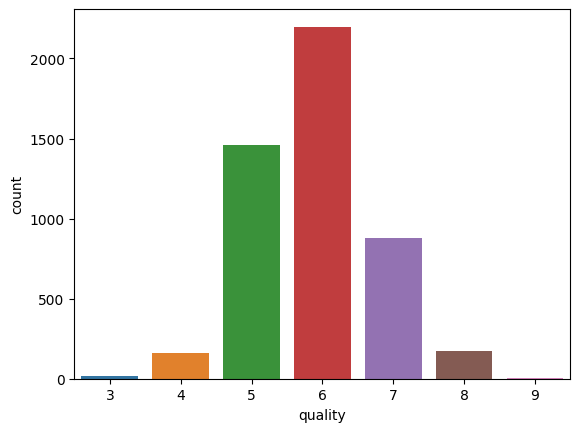

[20.0, 163.0, 1457.0, 2198.0, 880.0, 175.0, 5.0]


In [185]:
#checking the quality , our target variable
ax = sns.countplot(df,x="quality")
count = []
for p in ax.patches:
  count.append(p.get_height())
plt.show()

print(count)

<Axes: >

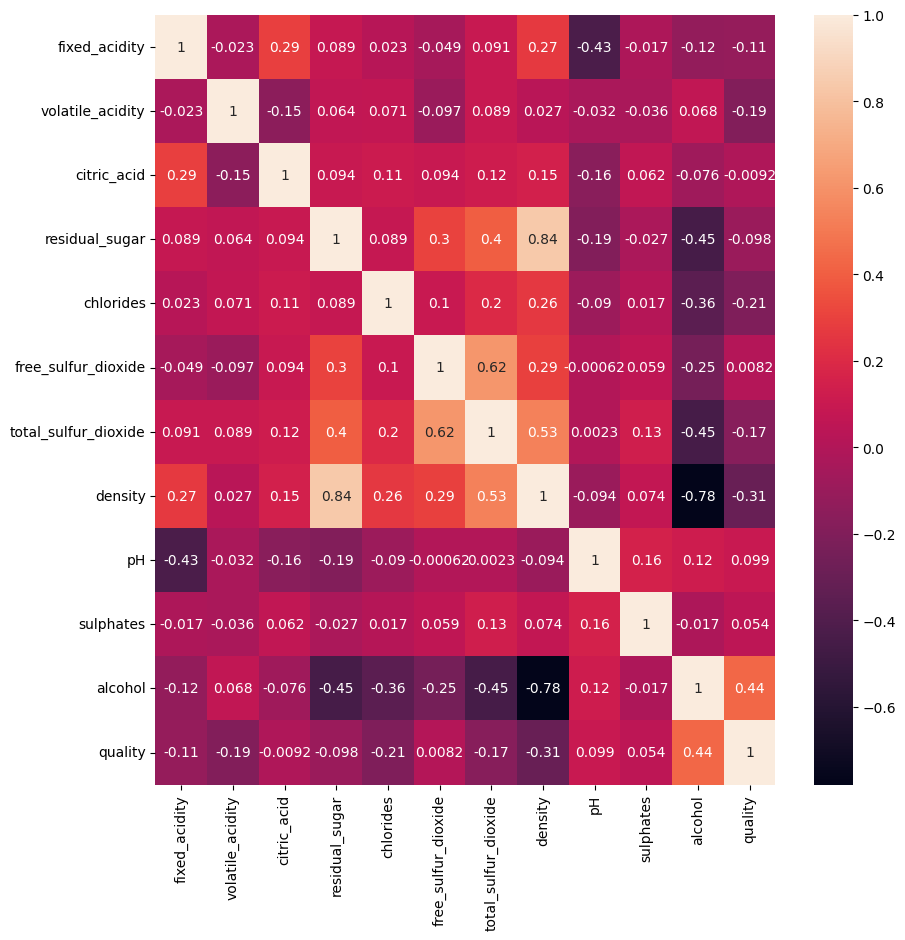

In [186]:
##Plotting correlation of features with each other and target

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

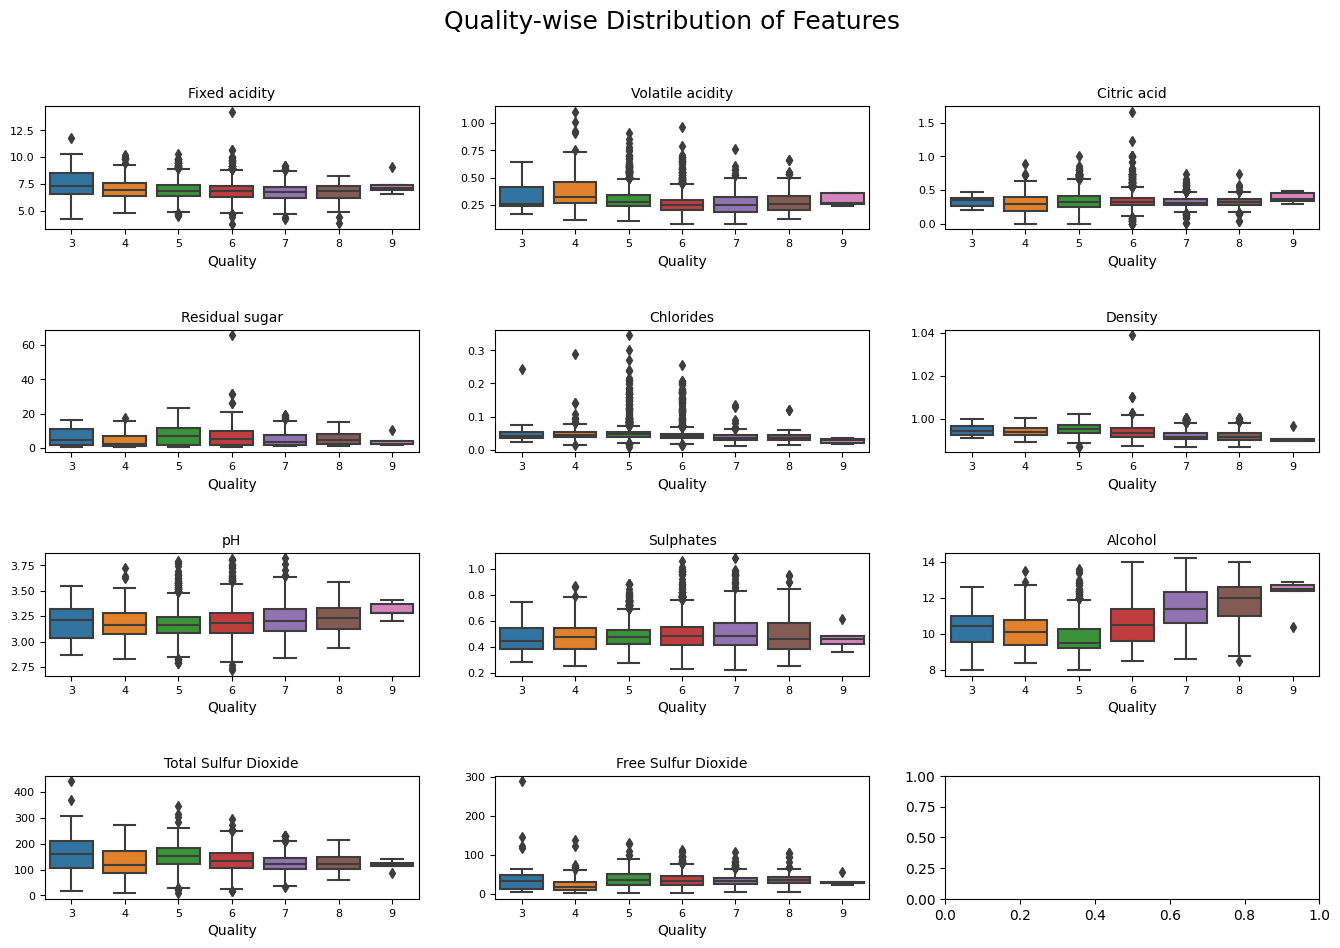

In [187]:
##Plotting Box-Plots of each feature with the target

cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
        'chlorides', 'density', 'pH', 'sulphates', 'alcohol','total_sulfur_dioxide','free_sulfur_dioxide']
labels = ['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual sugar',
        'Chlorides', 'Density', 'pH', 'Sulphates', 'Alcohol','Total Sulfur Dioxide','Free Sulfur Dioxide']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 10), dpi=100)
fig.suptitle('Quality-wise Distribution of Features', fontsize=18, y=0.97)
for col, label, ax in zip(cols, labels, axes.ravel()):
    sns.boxplot(data=df, x='quality', y=col, ax=ax)
    ax.set_title(label, fontsize=10)
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    ax.set_xlabel('Quality', fontsize=10)
    ax.set_ylabel('')
fig.tight_layout(pad=3)

In [188]:
correlation = df.corr()['quality'].to_numpy()
correlation = np.absolute(correlation)
correlation.sort()
correlation

##Sorted Correlation order(+ve or -ve)
#alcohol
#pH
#sulphates
#free_sulfur_dioxide
#citric_acid
#residual_sugar
#fixed_acidity
#total_sulfur_dioxide
#volatile_acidity
#chlorides
#density




array([0.00815807, 0.00920909, 0.05367788, 0.09757683, 0.09942725,
       0.11366283, 0.17473722, 0.19472297, 0.20993441, 0.30712331,
       0.43557472, 1.        ])

After trying different combinations of features the following set of features gives the best result. Alcohol,pH,sulphates and citric acid show good correlation with the target(quality).Fixed acidity and volatile acidity give a good variation in the box plot. Since resdual sugar and density are highly correlated their combination works well.

In [189]:
X_new = X[['alcohol','pH','sulphates','citric_acid','residual_sugar','density','volatile_acidity','fixed_acidity']]
X_new

,alcohol,pH,sulphates,citric_acid,residual_sugar,density,volatile_acidity,fixed_acidity
0,8.8,3.00,0.45,0.36,20.7,1.00100,0.27,7.0
1,9.5,3.30,0.49,0.34,1.6,0.99400,0.30,6.3
2,10.1,3.26,0.44,0.40,6.9,0.99510,0.28,8.1
3,9.9,3.19,0.40,0.32,8.5,0.99560,0.23,7.2
4,9.9,3.19,0.40,0.32,8.5,0.99560,0.23,7.2
...,...,...,...,...,...,...,...,...
4893,11.2,3.27,0.50,0.29,1.6,0.99114,0.21,6.2
4894,9.6,3.15,0.46,0.36,8.0,0.99490,0.32,6.6
4895,9.4,2.99,0.46,0.19,1.2,0.99254,0.24,6.5
4896,12.8,3.34,0.38,0.30,1.1,0.98869,0.29,5.5


**<h4>Linear Regression:</h4>**

In [190]:
#Train test split - 80%-20%
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size = 0.2, random_state = 42)

X_scaler = StandardScaler()

#Normalizing Data
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)



In [191]:
###Linear Regression

regressor = LinearRegression()
result = regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)

score = regressor.score(X_test,y_test)
print("R2 score: ",score)

Mean Absolute Error:  0.5856475897293765
R2 score:  0.2789510245910465


In [192]:
# Forming y_pred array with rounded category values
for i in range(len(y_pred)):
  if(abs(math.floor(y_pred[i])-y_pred[i])> abs(math.ceil(y_pred[i])-y_pred[i])):
    y_pred[i] = math.ceil(y_pred[i])
  else:
    y_pred[i] = math.floor(y_pred[i])

df = df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df

,Actual,Predicted
4656,7,6.0
3659,8,6.0
907,8,6.0
4352,5,6.0
3271,7,6.0
...,...,...
3207,6,6.0
1539,6,6.0
964,6,6.0
168,5,5.0


In [193]:
#Measuring accuracy
acc_df = (df['Actual']==df['Predicted'])
acc = acc_df.sum()/len(acc_df)
print("Accuracy: ",acc)

Accuracy:  0.5102040816326531


**<h4>Ordinal Regression:</h4>**

In [194]:
##Ordinal Regression

X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size = 0.2, random_state = 42)

X_scaler = StandardScaler()

#Normalizing data
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_test = y_test.to_numpy()
y_train = y_train.to_numpy()



In [195]:
model = OrderedModel(y_train,X_train,distr='logit')
result = model.fit(method='bfgs')
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.118800
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -4383.5
Model:                   OrderedModel   AIC:                             8795.
Method:            Maximum Likelihood   BIC:                             8883.
Date:                Sun, 08 Oct 2023                                         
Time:                        14:12:36                                         
No. Observations:                3918                                         
Df Residuals:                    3904                                         
Df Model:                           8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [196]:
#Calculating preds for the test data
predicted = result.model.predict(result.params, np.array(X_test))
preds = [np.argmax(x) + 3 for x in predicted]
acc = accuracy_score(y_test,preds)
mae = mean_absolute_error(y_test,preds)
print("Mean Absolute Error: ",mae)
print("Accuracy: ",acc)

Mean Absolute Error:  0.5275510204081633
Accuracy:  0.5275510204081633


In [197]:
df = df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': preds})
df

,Actual,Predicted
0,7,6
1,8,6
2,8,6
3,5,6
4,7,6
...,...,...
975,6,6
976,6,6
977,6,6
978,5,5


<Axes: >

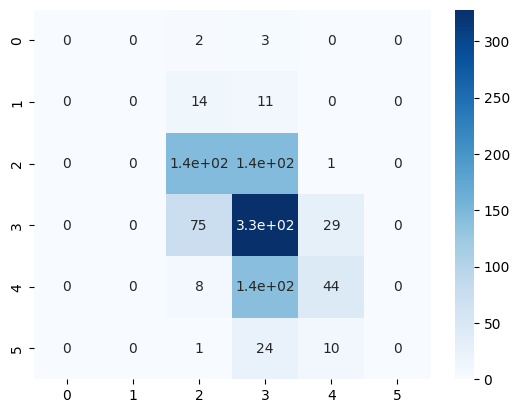

In [198]:
#Confusion Matrix for the test data
conf = confusion_matrix(y_test,preds)
sns.heatmap(conf,annot=True,cmap='Blues')

**Conclusion:**


1.   After using both linear and ordinal regression models, we see that ordianl regression performs slighlty better than the linear regression model. Ordinal regression churns out a model giving 52.75% accuracy and 0.5275 mean absolute error. On the other hand linear regression gives 51.02% accuracy and 0.585 mean absolute error on the test data.  
2.   We could use ordinal regression on this dataset since the categories have a order with quality increasing from 3 to 9.
3.   However we can see that the distribution of wine quality frequency can be approximated to gaussian centered at 6
4.   The metrics we used is Mean Absolute Error and Accuracy. Mean absolute error is a good metric for linear regression where the values predicted continuous and accuracy is used to measure the correctly predicted categories wherin for linear regression we rounded off to the nearest category.
5.   The reults could further be improved using good feature selection and perhaps softmax classification could be tried.

